In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('pizza_delivery.csv')

df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


### 1. Erzeugen Sie eine Frequenztabelle bezuglich der Zustellungen per Filiale (relative und absolute Häufigkeiten)

In [5]:
df_frequencies = pd.DataFrame()

df_frequencies['absolute_branch'] = df.branch.value_counts()

df_frequencies['relative_branch'] = df.branch.value_counts(normalize=True)

In [6]:
df_frequencies

,absolute_branch,relative_branch
West,435,0.343602
Centre,421,0.332543
East,410,0.323855


### Stellen Sie die Häufigkeiten bzgl. der Filialen aus (1) als Balkendiagramm dar.

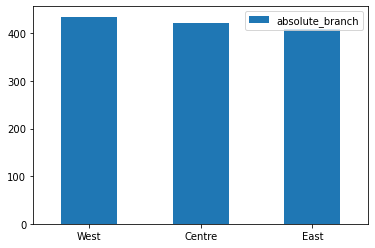

In [8]:
ax = df_frequencies.plot.bar( y='absolute_branch', rot=0)

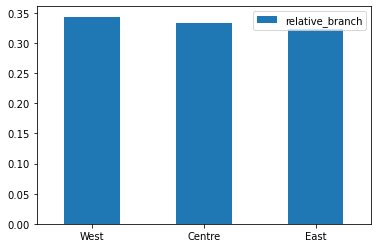

In [9]:
ax = df_frequencies.plot.bar( y='relative_branch', rot=0)

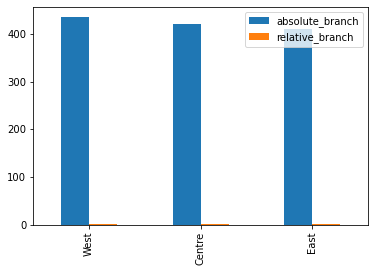

In [10]:
ax = df_frequencies.plot.bar()

 ### Erzeugen Sie ein Histogramm bzgl. der Zustellzeiten

<AxesSubplot:>

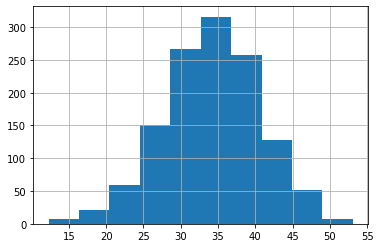

In [11]:
df.time.hist()

### Berechnen Sie den Mittelwert, den Median, Minimum und Maximum,erstes und drittes Quartil fur alle quantitativen Variablen.

In [12]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [14]:
df[['time', 'temperature', 'bill','pizzas']].describe()

,time,temperature,bill,pizzas
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,34.229551,62.863950,42.755924,3.013428
std,6.461478,6.905708,11.222918,1.467102
min,12.266028,41.758718,9.100000,1.000000
25%,30.061151,58.242364,35.500000,2.000000
50%,34.381964,62.926657,42.900000,3.000000
75%,38.577021,67.228628,50.500000,4.000000
max,53.096264,87.582422,75.000000,11.000000


In [15]:
df[['time', 'temperature', 'bill','pizzas']].median()

time           34.381964
temperature    62.926657
bill           42.900000
pizzas          3.000000
dtype: float64

### Das Ziel des Managers ist die Pizza in weniger als 30min und mit einer Temperatur von uber 65 ◦C zuzustellen. Verwenden Sie den tTest um zu uberprüfen, ob diese Ziele im Durchschnitt erreicht wurden. Überlegen Sie welche Art von ¨ t−Test hier jeweils angewendet werden muss.

In [6]:
import scipy.stats as stats

In [7]:
t_statistic, p_value = stats.ttest_1samp(a=df.time, popmean=30)
print(t_statistic , p_value)

23.290525733651325 3.885160858724638e-100


In [8]:
t_statistic, p_value = stats.ttest_1samp(a=df.temperature, popmean=65)
print(t_statistic , p_value)

-11.005762229579862 5.734107019184443e-27


p-value ist kleiner als 0,05 daraus folgt Null Hypothese wird verworfen. 